#Import all the important libraries

In [2]:

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer
import matplotlib.mlab as mlab
import seaborn as sns


#Load the data set and then eliminate or rename unnecessary columns


In [4]:
disease_df = pd.read_csv("framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


#Each Column Aalysis

In [5]:
sns.pairplot(disease_df)

Output hidden; open in https://colab.research.google.com to view.

#using info and other comments to analysis the data on numerical basis


In [6]:
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

#Create Imputer, do some normalization into data and train test split

In [7]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose','BMI','heartRate']])
y = np.asarray(disease_df['TenYearCHD'])


X = preprocessing.StandardScaler().fit(X).transform(X)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2625, 8) (2625,)
Test set: (1126, 8) (1126,)


#Counting no. of patients affected with CHD


<ipython-input-8-b147dd260193>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


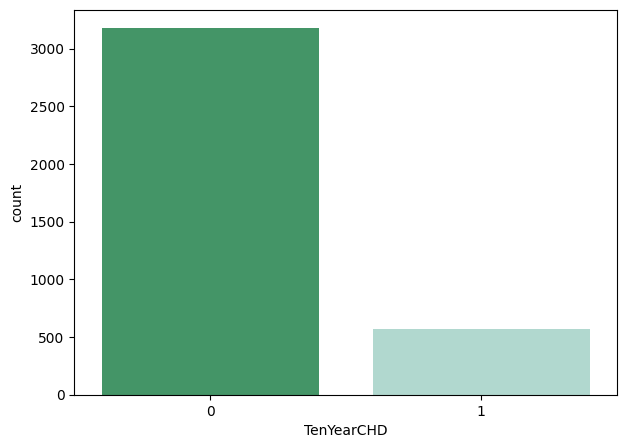

In [8]:

plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

#laste ploting

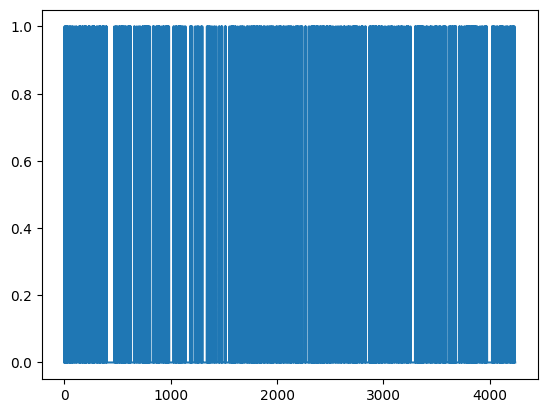

In [9]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

#Implementing logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy of the model is ',accuracy_score(y_test, y_pred))

Accuracy of the model is  0.8525754884547069


#Heat map of logistic Regression

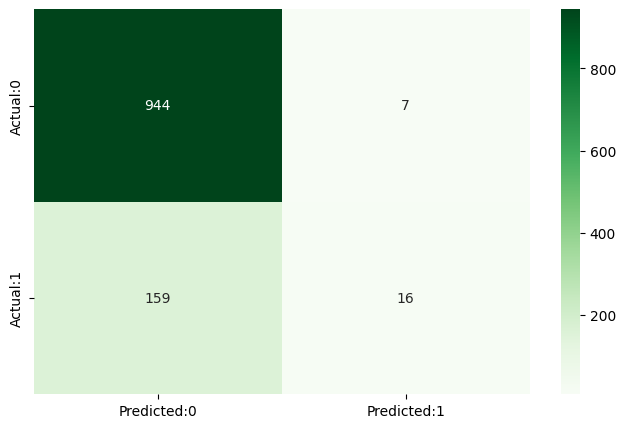

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       951
           1       0.70      0.09      0.16       175

    accuracy                           0.85      1126
   macro avg       0.78      0.54      0.54      1126
weighted avg       0.83      0.85      0.80      1126



In [43]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

#Implementing Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.844582593250444


#Heat map of Random Forest Classifier

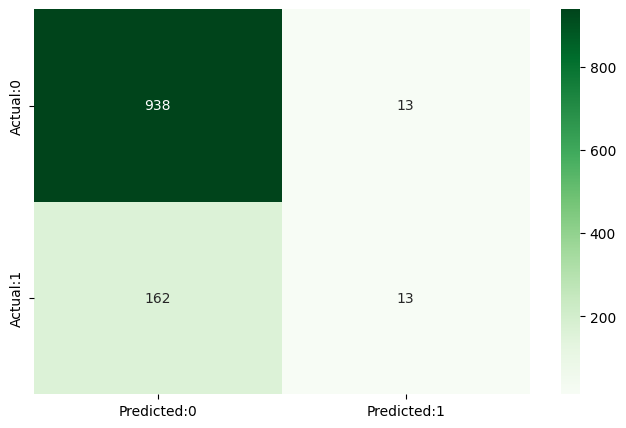

In [40]:
cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

#Implementing KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Accuracy:", accuracy_score(y_test, yhat))

Accuracy: 0.8436944937833037


#Heat map of KNN

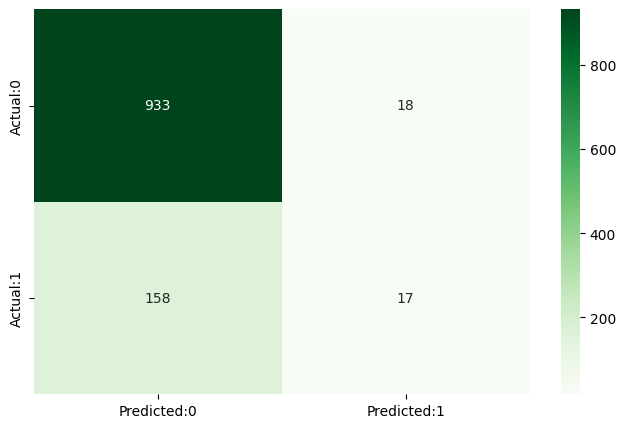

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, yhat)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

#Implementing SVM

In [37]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat_svm = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, yhat_svm))

Accuracy: 0.8419182948490231


#Heat map of SVM

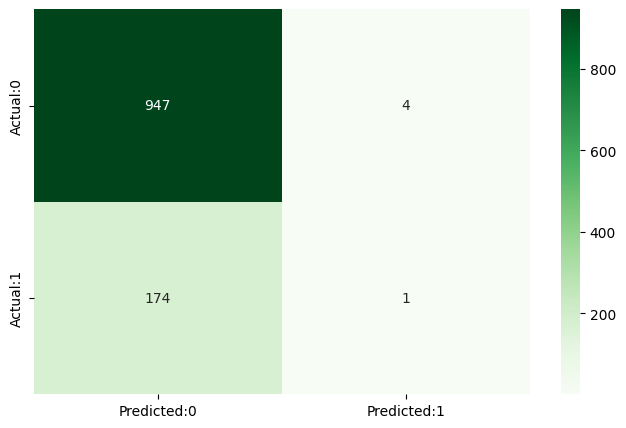

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       951
           1       0.20      0.01      0.01       175

    accuracy                           0.84      1126
   macro avg       0.52      0.50      0.46      1126
weighted avg       0.74      0.84      0.77      1126



In [38]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, yhat_svm)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print (classification_report(y_test, yhat_svm))

#Ploting bar graph to present best accurate model.

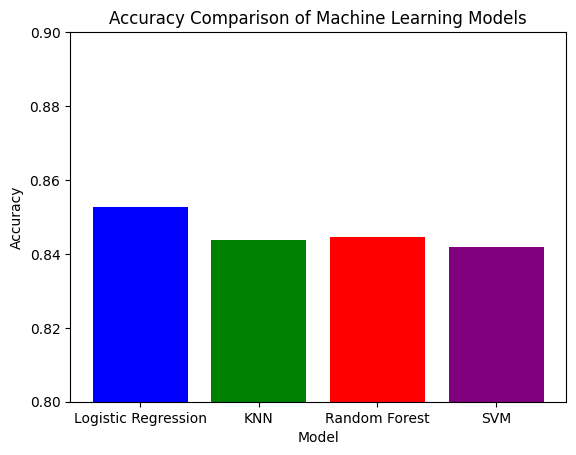

In [46]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier(n_neighbors=7)),
    ('Random Forest', RandomForestClassifier(n_estimators=1000, random_state=1)),
    ('SVM', svm.SVC(kernel='rbf'))
]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

names, accuracies = zip(*results)
colors = ['blue', 'green', 'red', 'purple']
plt.bar(names, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.ylim(0.8, 0.9)
plt.xticks(rotation=0)
plt.show()